##Basic Image Enhancement Using Mathematical Operations
Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:


Arithmetic Operations like addition, multiplication

Thresholding & Masking

Bitwise Operations like OR, AND, XOR

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
%matplotlib inline

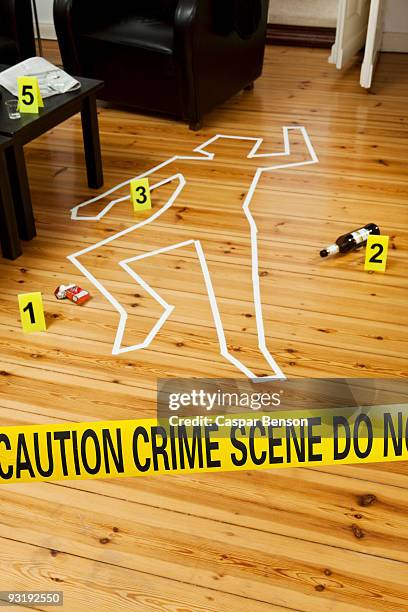

In [3]:
Img_bgr=cv2.imread("/content/crime.jpg",cv2.IMREAD_COLOR)
Img_rgb=cv2.cvtColor(Img_bgr,cv2.COLOR_BGR2RGB)

#DISPLAY
Image(filename="/content/crime.jpg")

##Addition or Brightness

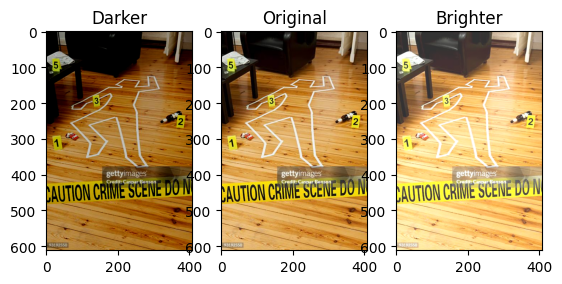

In [7]:
matrix=np.ones(Img_rgb.shape, dtype="uint8")*50
img_rgb_brighter=cv2.add(Img_rgb,matrix)
img_rgb_darker=cv2.subtract(Img_rgb,matrix)

#show the images
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(Img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

##Multiplication or Contrast

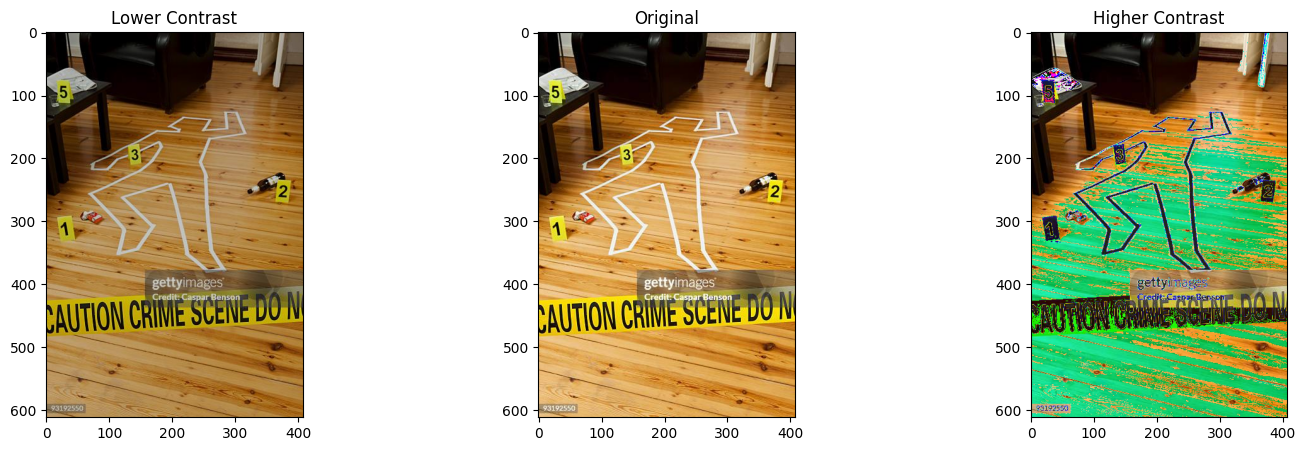

In [8]:
from re import I
matrix1 = np.ones(Img_rgb.shape) * 0.8
matrix2 = np.ones(Img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(Img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(Img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(Img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

##Image Thresholding

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

#Function Syntax
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
dst: The output array of the same size and type and the same number of channels as src.

The function has 4 required arguments:

src: input array (multiple-channel, 8-bit or 32-bit floating point).

thresh: threshold value.

maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type: thresholding type (see ThresholdTypes).

#Function Syntax
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
dst Destination image of the same size and the same type as src.

The function has 6 required arguments:

src: Source 8-bit single-channel image.

maxValue: Non-zero value assigned to the pixels for which the condition is satisfied

adaptiveMethod: Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

thresholdType: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

(612, 408)


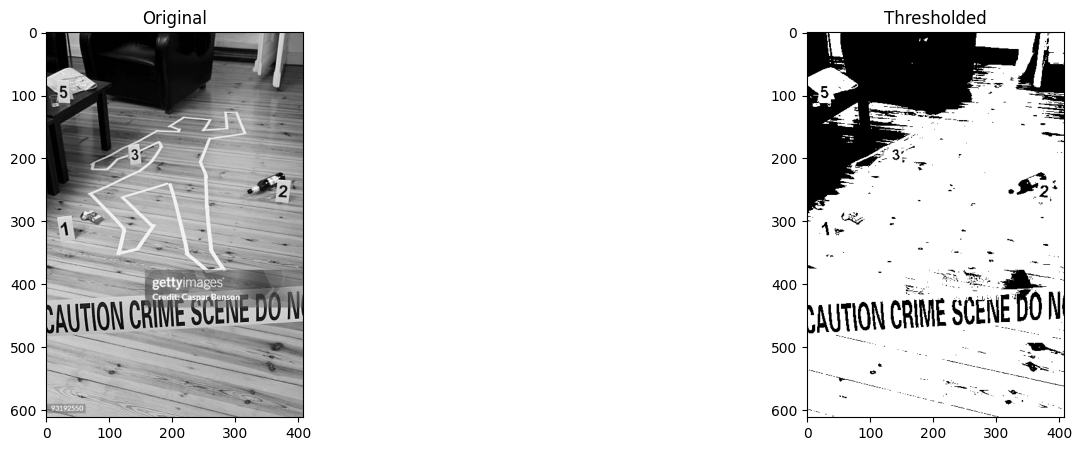

In [9]:
img_read = cv2.imread("/content/crime.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)
#retval, dst = cv2.threshold( src(input image), thresh(threshhold value), maxval, type[, dst] )
# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

##Application: Sheet Music Reader

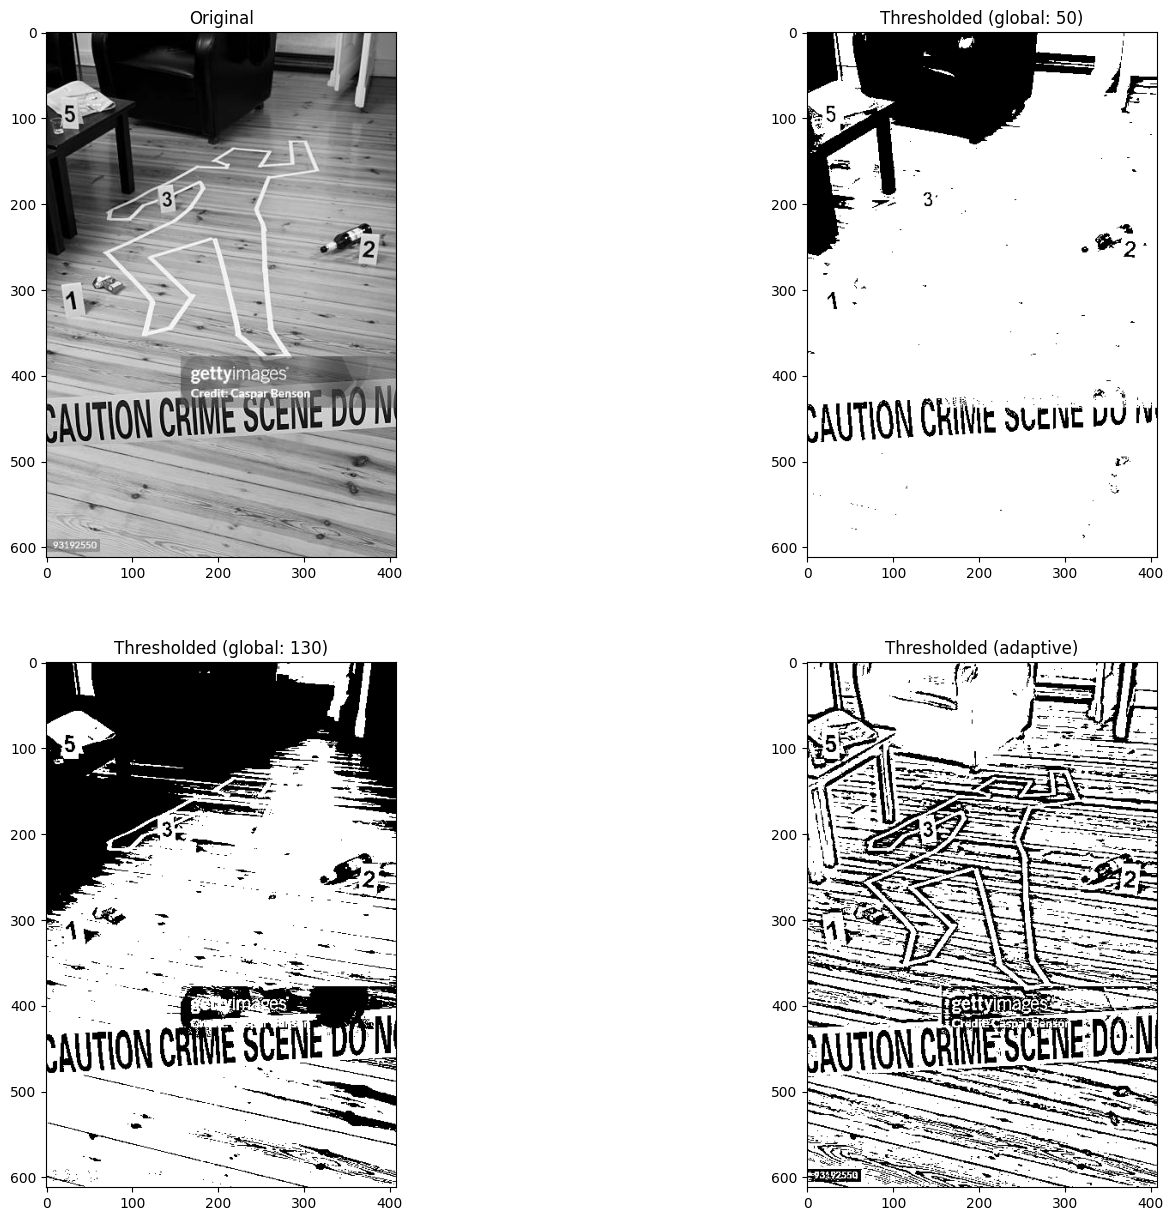

In [18]:
# Read the original image
img_read = cv2.imread("/content/crime.jpg", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");


##Bitwise Operations

##Function Syntax
Example API for cv2.bitwise_and(). Others include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
dst: Output array that has the same size and type as the input arrays.

The function has 2 required arguments:

src1: first input array or a scalar.

src2: second input array or a scalar.

An important optional argument is:

mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

In [32]:
'''img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)'''

'img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)\n\nimg_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)\n\nplt.figure(figsize=[20, 5])\nplt.subplot(121);plt.imshow(img_rec, cmap="gray")\nplt.subplot(122);plt.imshow(img_cir, cmap="gray")\nprint(img_rec.shape)'

##Bitwise AND Operator

In [33]:
'''result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")'''

'result = cv2.bitwise_and(img_rec, img_cir, mask=None)\nplt.imshow(result, cmap="gray")'

##Application: Logo Manipulation

(612, 408, 3)


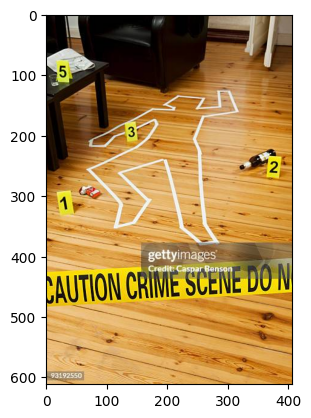

In [34]:
img_bgr = cv2.imread("/content/crime.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(433, 612, 3)


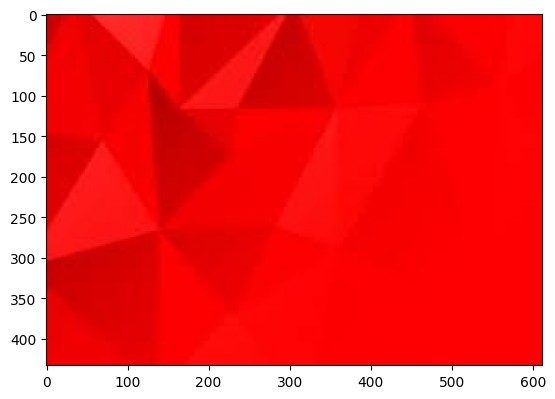

In [35]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("/content/red.jpg")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

##Create Mask for original Image

(612, 408)


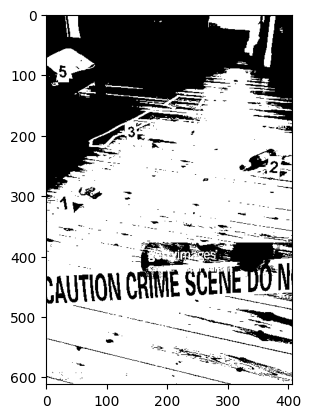

In [43]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
img_mask = img_mask.astype('uint8')
plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

##Invert the Mask

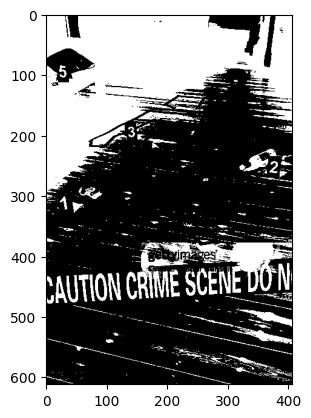

In [42]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

##Apply background on the Mask

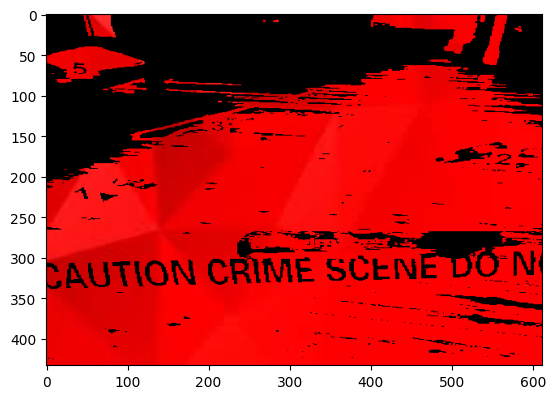

In [45]:
# Create colorful background "behind" the logo lettering
img_mask = cv2.resize(img_mask, (img_background_rgb.shape[1], img_background_rgb.shape[0]))
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

##Isolate foreground from image

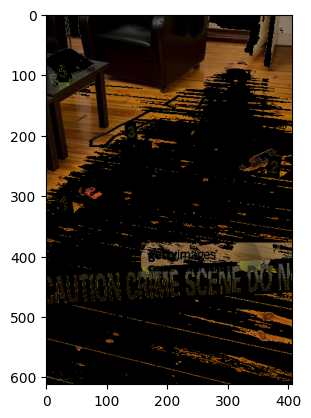

In [46]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

##Result: Merge Foreground and Background

True

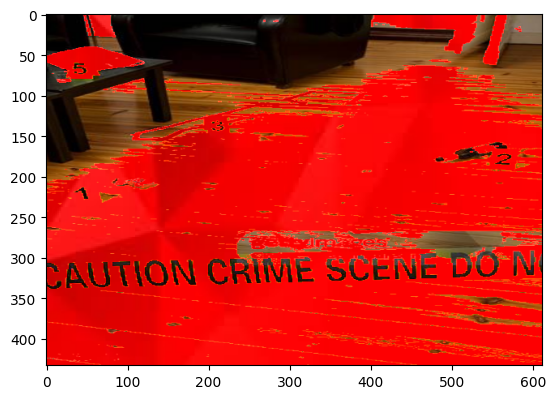

In [49]:
# Add the two previous results obtain the final result
img_foreground = cv2.resize(img_foreground, (img_background.shape[1], img_background.shape[0]))
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])